# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 04</span>

In quest'esercitazione viene simulata la dinamica di un sistema classico di N molecole che interagiscono tramite un potenziale di Lennerd-Jones.
$$V_{LJ}(r)=4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6} \right]$$

## <span style="color:blue"> Esercizio 04.1 </span>

Al codice di Molecular Dynamics / Monte Carlo (MD_MC.cpp) fornito, che già misurava l'energia interna totale per particella $E/N$, l'energia cinetica per particella $K/N$, l'energia potenziale per particella $U/N$ e la temperatura $T$, è stato aggiunto il calcolo della pressione $P$ come
$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

## <span style="color:blue"> Esercizio 04.2 </span>

Si vuole ora compiere una simulazione MD di $N=108$ molecole di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni di densità $\rho^\star$ (in unità di LJ), temperatura $T^\star$ (in unità di LJ) e raggio di cut-off dell'interazione $r_c$ (in unità di $\sigma$):
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$


Come prima cosa, il sistema viene creato con una struttura cristallina per evitare sovrapposizioni di particelle che comporterebbero delle divergenze non-fisiche. Successivamente vengono fornite le velocità iniziali distribuite normalmente attorno ad un valore medio compatibile con la temperatura iniziale.  
A causa della bassa entropia della configurazione di partenza però, è necessario fornire in input un valore di temperatura maggiore (per la fase solida e liquida) o minore (per la fase gassosa) e aspettare che il sistema si assesti prima di poter misurare le osservabili. Infatti, l'algoritmo di integrazione di Verlet usato per muovere il sistema conserva l'energia totale: di conseguenza, a seconda che la configurazione cristallina iniziale abbia energia potenziale maggiore/minore rispetto al valore che ha all'equilibrio, essa tenderà a diminuire/aumentare portando quindi l'energia cinetica ad aumentare/diminuire e con essa la temperatura.
Questo processo viene detto equilibrazione.

Il sistema evolve nel tempo calcolando le forze che agiscono su ogni particella entro il raggio di cut-off $r_c$ e aggiornando individualmente la loro posizione. Il processo viene ripetuto 2000 volte per blocco (10000 per il gas), durante le quali vengono compiute altrettante misure delle sopracitate grandezze termodinamiche al fine di calcolare i loro valori medi e le incertezze progressive in funzione del numero di blocchi sommati. I risultati sono mostrati nei plot che seguono.

### Energia totale per particella

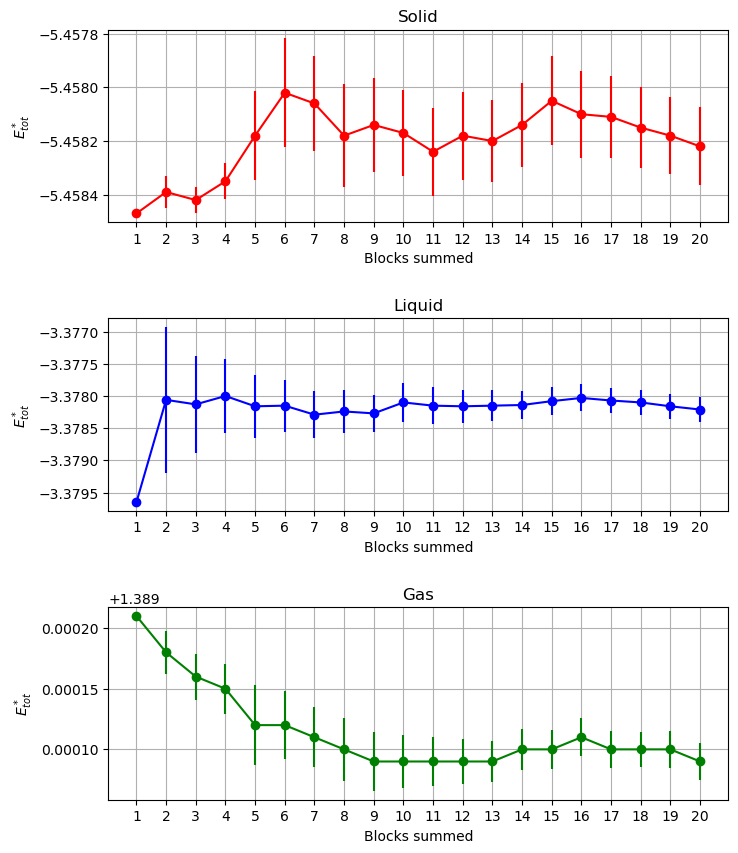

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_etot.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(8, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5)

# Primo subplot
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color='red')
axs[0].set_xticks(np.arange(1, 21, 1))
axs[0].set_xlabel("Blocks summed")
axs[0].set_ylabel(r"$E_{tot}^*$")

axs[0].set_title("Solid")


# Secondo subplot
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color='blue')
axs[1].set_xticks(np.arange(1, 21, 1))
axs[1].set_xlabel("Blocks summed")
axs[1].set_ylabel(r"$E_{tot}^*$")

axs[1].set_title("Liquid")


# Terzo subplot
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color='green')
axs[2].set_xticks(np.arange(1, 21, 1))
axs[2].set_xlabel("Blocks summed")
axs[2].set_ylabel(r"$E_{tot}^*$")

axs[2].set_title("Gas")


# Aggiungi la griglia
for ax in axs:
    ax.grid(True)

# Mostra il grafico
plt.show()

### Energia potenziale per particella

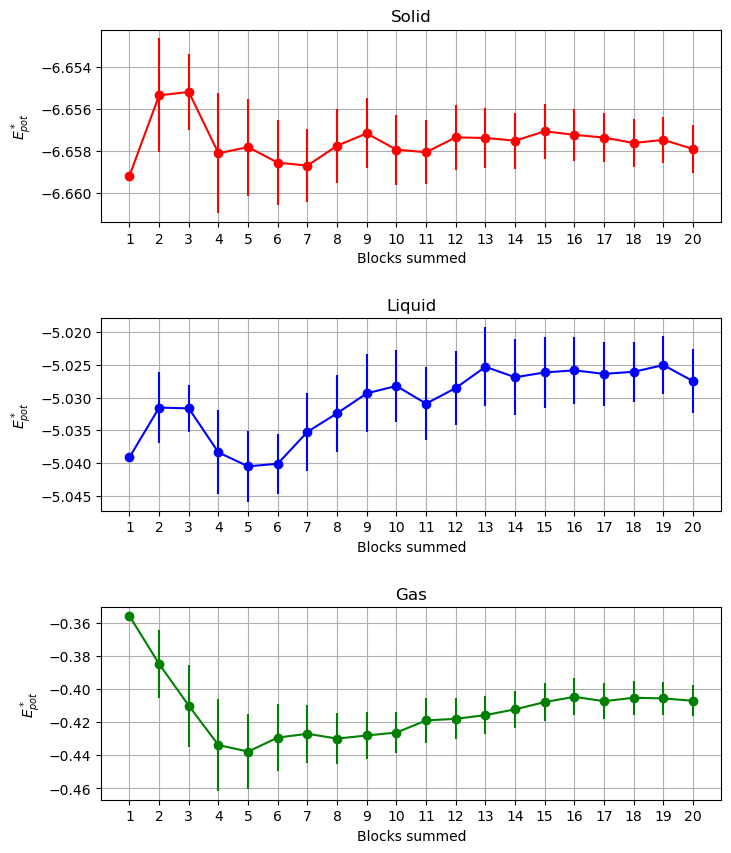

In [2]:
# Leggi i dati dal file
data = np.loadtxt("output_epot.dat", usecols=(0,2,3))


# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(8, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5)


# Primo subplot
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color='red')
axs[0].set_xticks(np.arange(1, 21, 1))
axs[0].set_xlabel("Blocks summed")
axs[0].set_ylabel(r"$E_{pot}^*$")

axs[0].set_title("Solid")


# Secondo subplot
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color='blue')
axs[1].set_xticks(np.arange(1, 21, 1))
axs[1].set_xlabel("Blocks summed")
axs[1].set_ylabel(r"$E_{pot}^*$")

axs[1].set_title("Liquid")


# Terzo subplot
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color='green')
axs[2].set_xticks(np.arange(1, 21, 1))
axs[2].set_xlabel("Blocks summed")
axs[2].set_ylabel(r"$E_{pot}^*$")

axs[2].set_title("Gas")


# Aggiungi la griglia
for ax in axs:
    ax.grid(True)

# Mostra il grafico
plt.show()

### Energia cinetica per particella

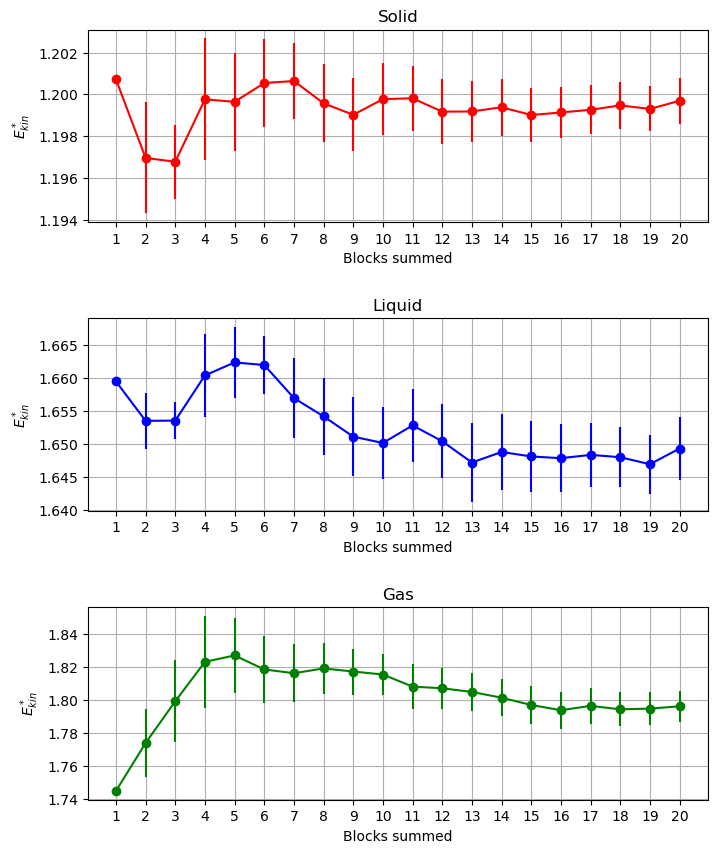

In [3]:
# Leggi i dati dal file
data = np.loadtxt("output_ekin.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(8, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5)


# Primo subplot
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color='red')
axs[0].set_xticks(np.arange(1, 21, 1))
axs[0].set_xlabel("Blocks summed")
axs[0].set_ylabel(r"$E_{kin}^*$")

axs[0].set_title("Solid")


# Secondo subplot
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color='blue')
axs[1].set_xticks(np.arange(1, 21, 1))
axs[1].set_xlabel("Blocks summed")
axs[1].set_ylabel(r"$E_{kin}^*$")

axs[1].set_title("Liquid")


# Terzo subplot
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color='green')
axs[2].set_xticks(np.arange(1, 21, 1))
axs[2].set_xlabel("Blocks summed")
axs[2].set_ylabel(r"$E_{kin}^*$")

axs[2].set_title("Gas")


# Aggiungi la griglia
for ax in axs:
    ax.grid(True)

# Mostra il grafico
plt.show()

### Temperatura

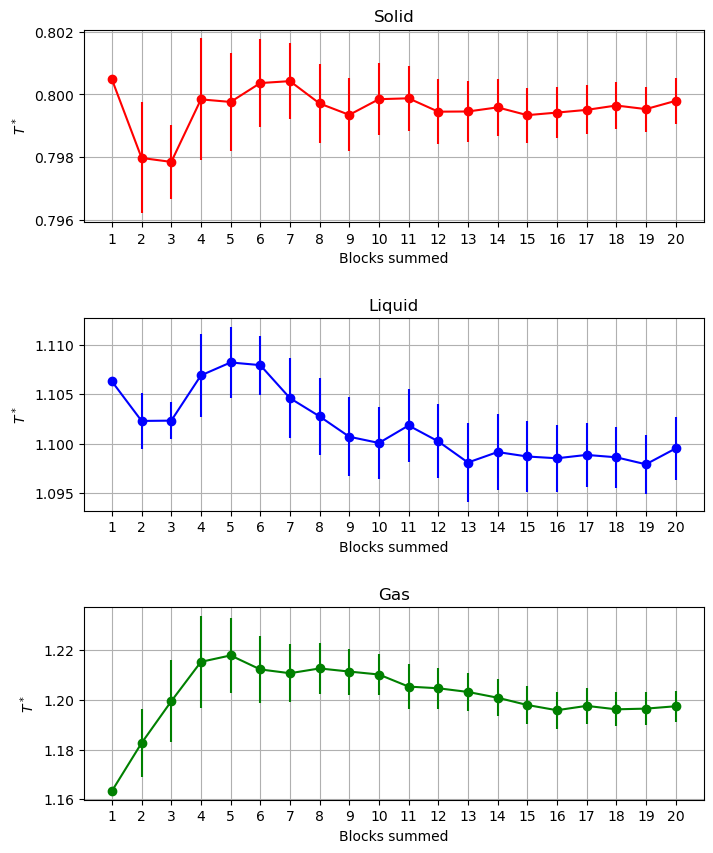

In [4]:
# Leggi i dati dal file
data = np.loadtxt("output_temp.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(8, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5)


# Primo subplot
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color='red')
axs[0].set_xticks(np.arange(1, 21, 1))
axs[0].set_xlabel("Blocks summed")
axs[0].set_ylabel(r"$T^*$")

axs[0].set_title("Solid")


# Secondo subplot
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color='blue')
axs[1].set_xticks(np.arange(1, 21, 1))
axs[1].set_xlabel("Blocks summed")
axs[1].set_ylabel(r"$T^*$")

axs[1].set_title("Liquid")


# Terzo subplot
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color='green')
axs[2].set_xticks(np.arange(1, 21, 1))
axs[2].set_xlabel("Blocks summed")
axs[2].set_ylabel(r"$T^*$")

axs[2].set_title("Gas")


# Aggiungi la griglia
for ax in axs:
    ax.grid(True)

# Mostra il grafico
plt.show()


### Pressione

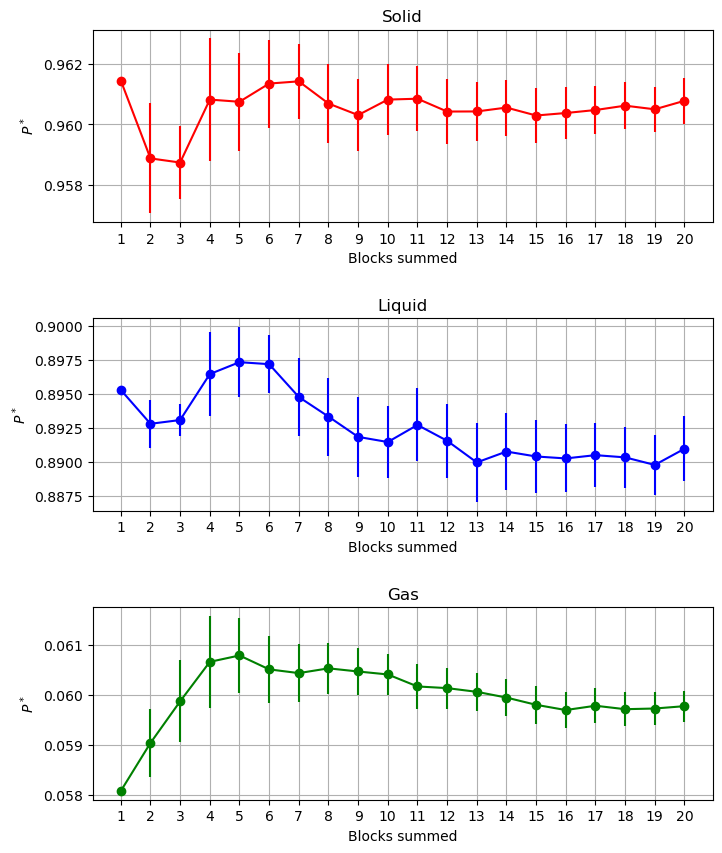

In [5]:
# Leggi i dati dal file
data = np.loadtxt("output_press.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(8, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5)


# Primo subplot
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color='red')
axs[0].set_xticks(np.arange(1, 21, 1))
axs[0].set_xlabel("Blocks summed")
axs[0].set_ylabel(r"$P^*$")

axs[0].set_title("Solid")


# Secondo subplot
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color='blue')
axs[1].set_xticks(np.arange(1, 21, 1))
axs[1].set_xlabel("Blocks summed")
axs[1].set_ylabel(r"$P^*$")

axs[1].set_title("Liquid")


# Terzo subplot
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color='green')
axs[2].set_xticks(np.arange(1, 21, 1))
axs[2].set_xlabel("Blocks summed")
axs[2].set_ylabel(r"$P^*$")

axs[2].set_title("Gas")


# Aggiungi la griglia
for ax in axs:
    ax.grid(True)

# Mostra il grafico
plt.show()